# Imports

In [698]:
# Abdurrahman Bulut
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from scipy import stats

sns.set_style('darkgrid') 


In [734]:
df = pd.read_csv("house_price_prediction.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 81)

# Keşifçi Veri Analizi

In [632]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [580]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [581]:
df.shape

(1460, 81)

In [582]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [735]:
# Define the function to grab column names based on data types and unique values
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == 'O']

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car

In [736]:
# Apply the function to get column names
categorical_features, numerical_features, cat_but_car = grab_col_names(df)
# Output the results
print(f"Categorical columns: {categorical_features}")
print(f"Numerical columns: {numerical_features}")
print(f"Cardinal columns: {cat_but_car}")

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']
Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt'

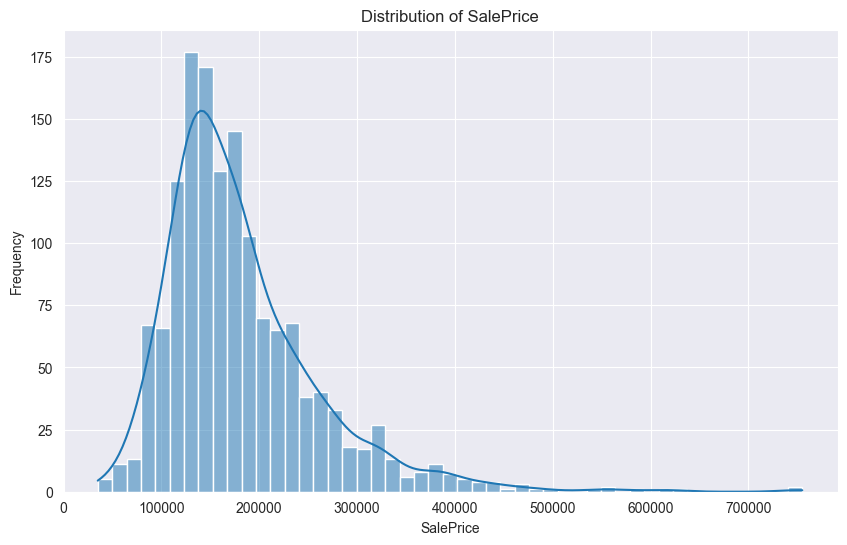

In [472]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [473]:
correlation_matrix = df[numerical_features].corr()

In [474]:
saleprice_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
saleprice_correlation

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotArea          0.263843
BsmtUnfSF        0.214479
ScreenPorch      0.111447
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

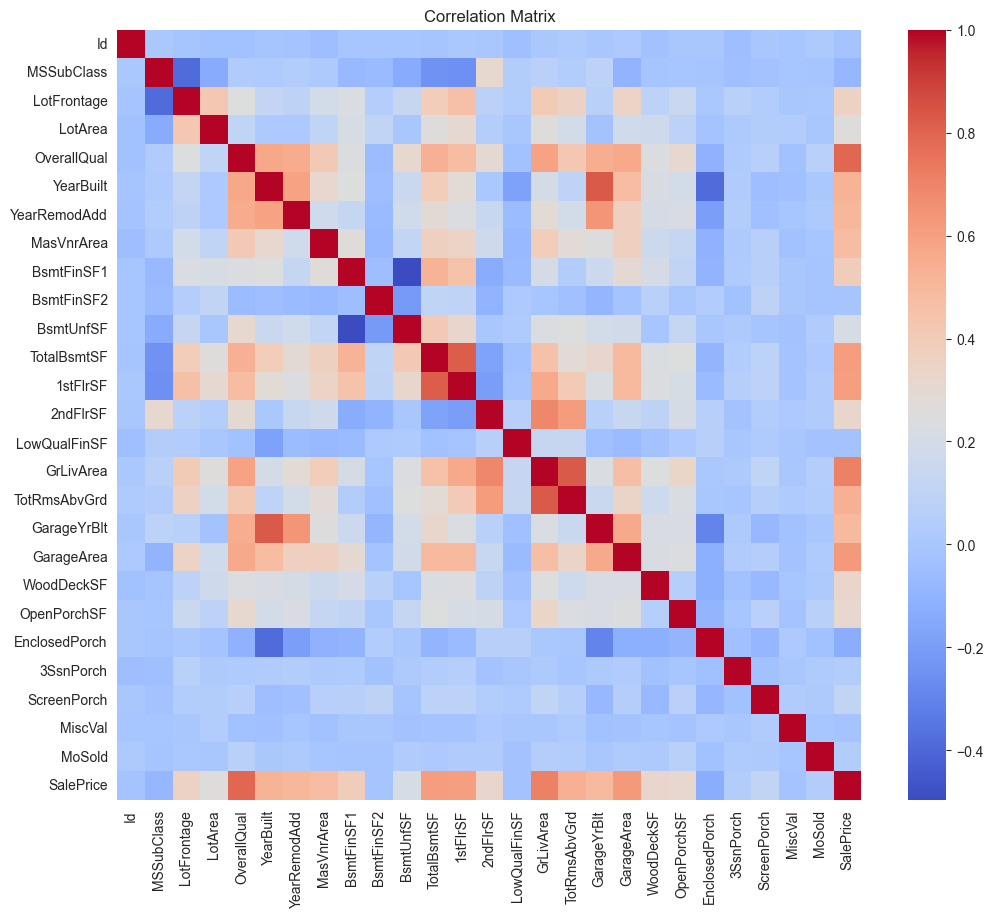

In [475]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [476]:
# 'SalePrice' ile en yüksek korelasyona sahip ilk 10 değişken
top_correlated_features = saleprice_correlation.index[1:11]
top_correlated_features

Index(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea'],
      dtype='object')

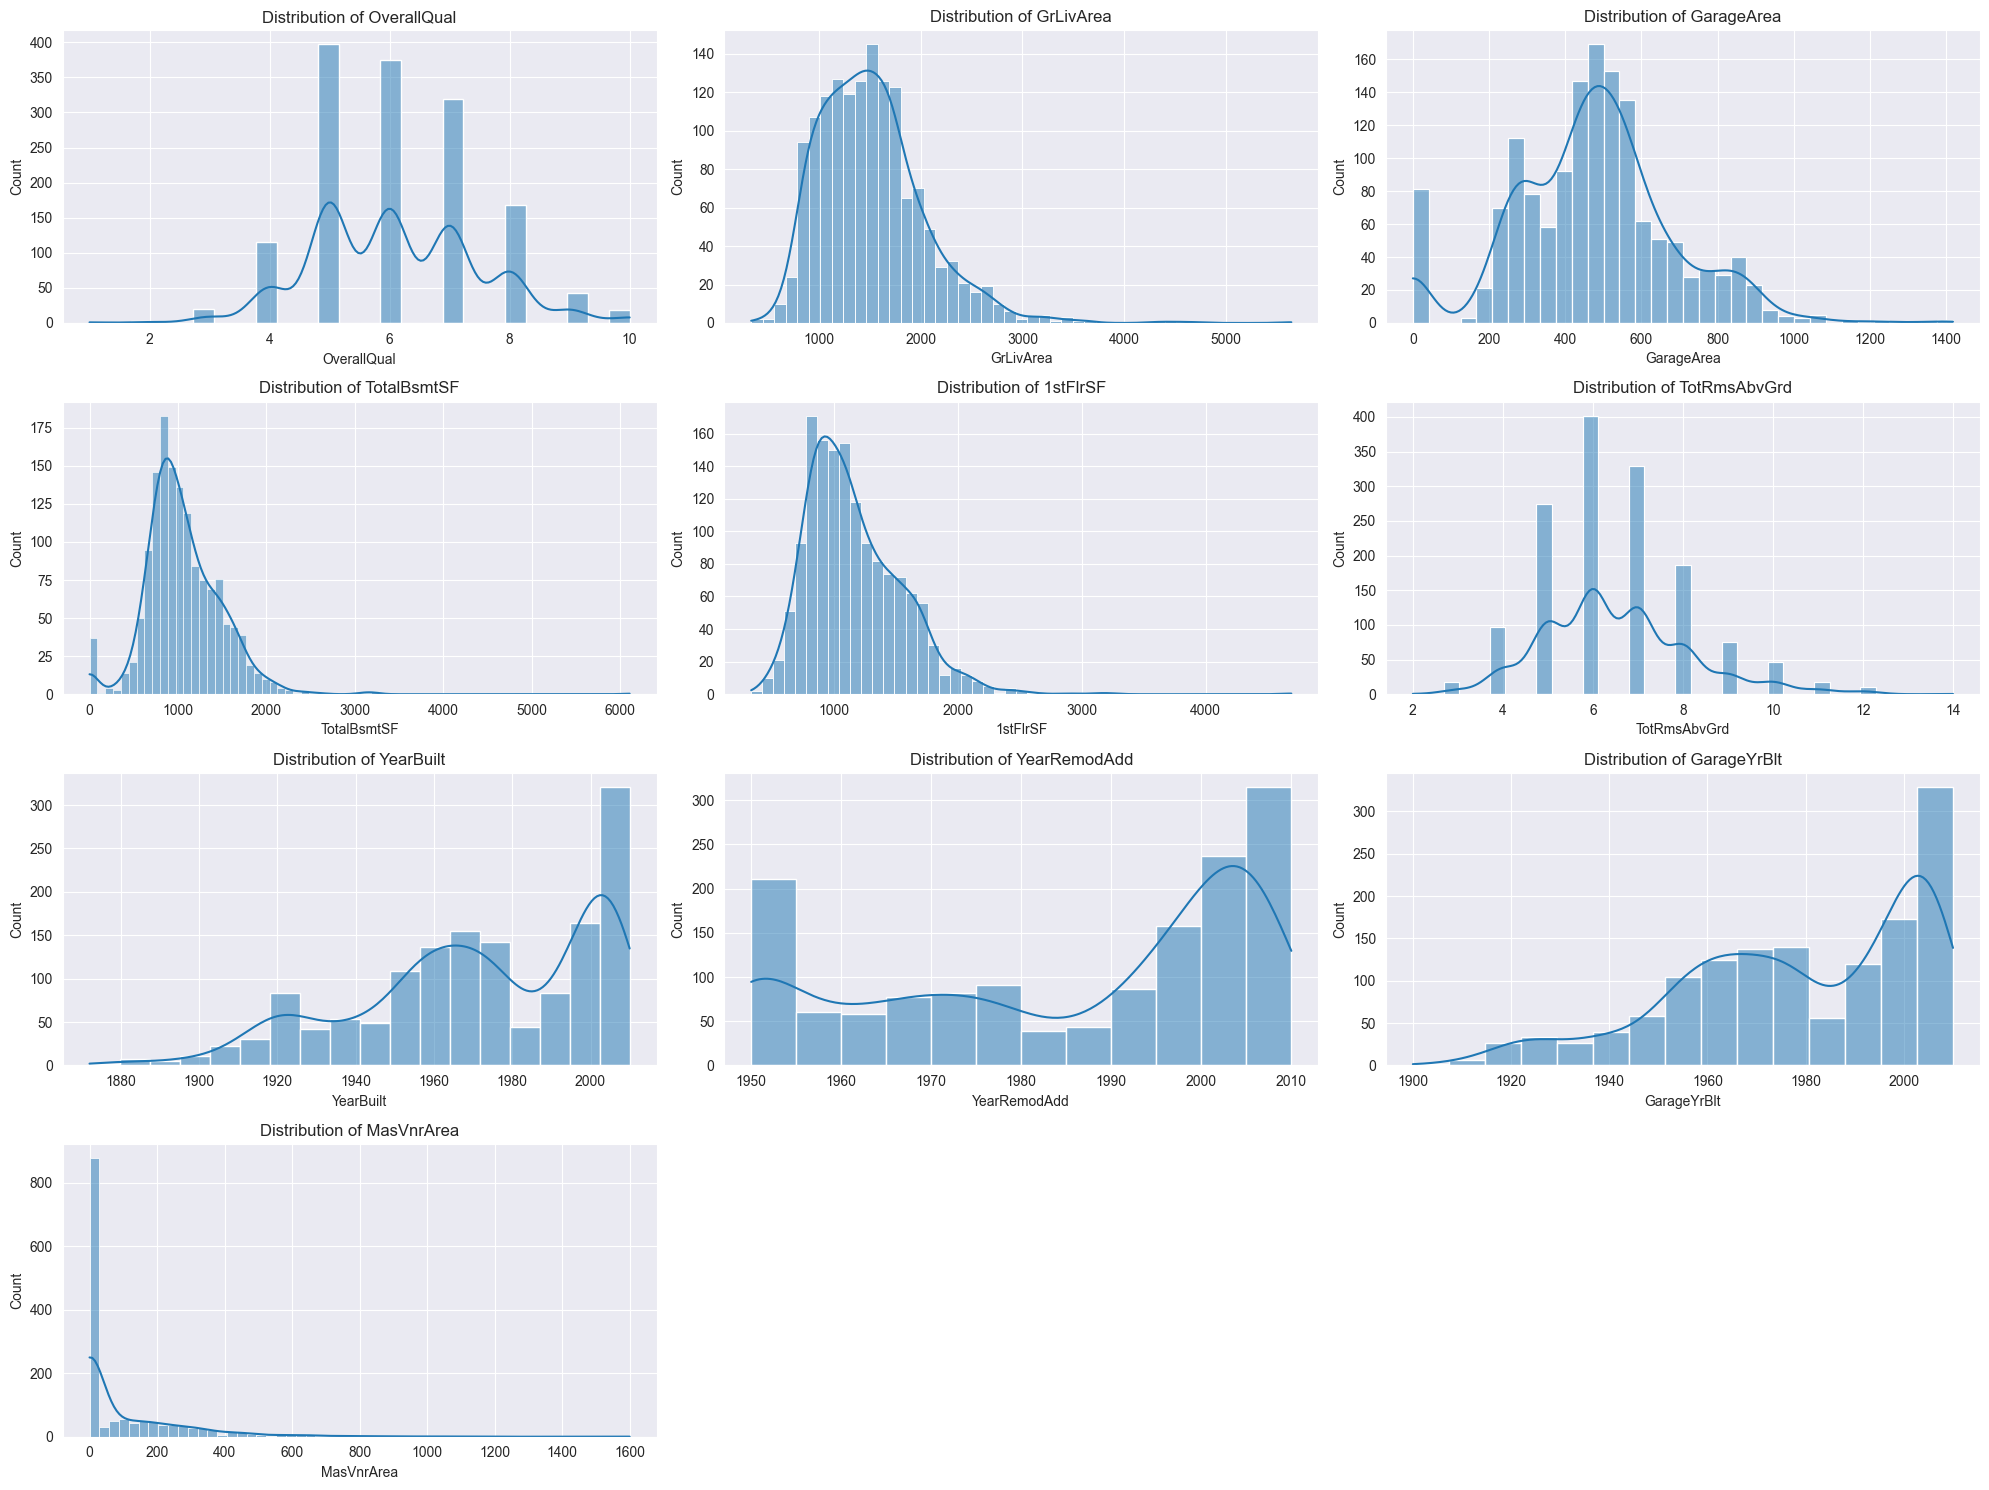

In [477]:
# Önemli sayısal değişkenlerin dağılımı
plt.figure(figsize=(20, 15))
for i, feature in enumerate(top_correlated_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

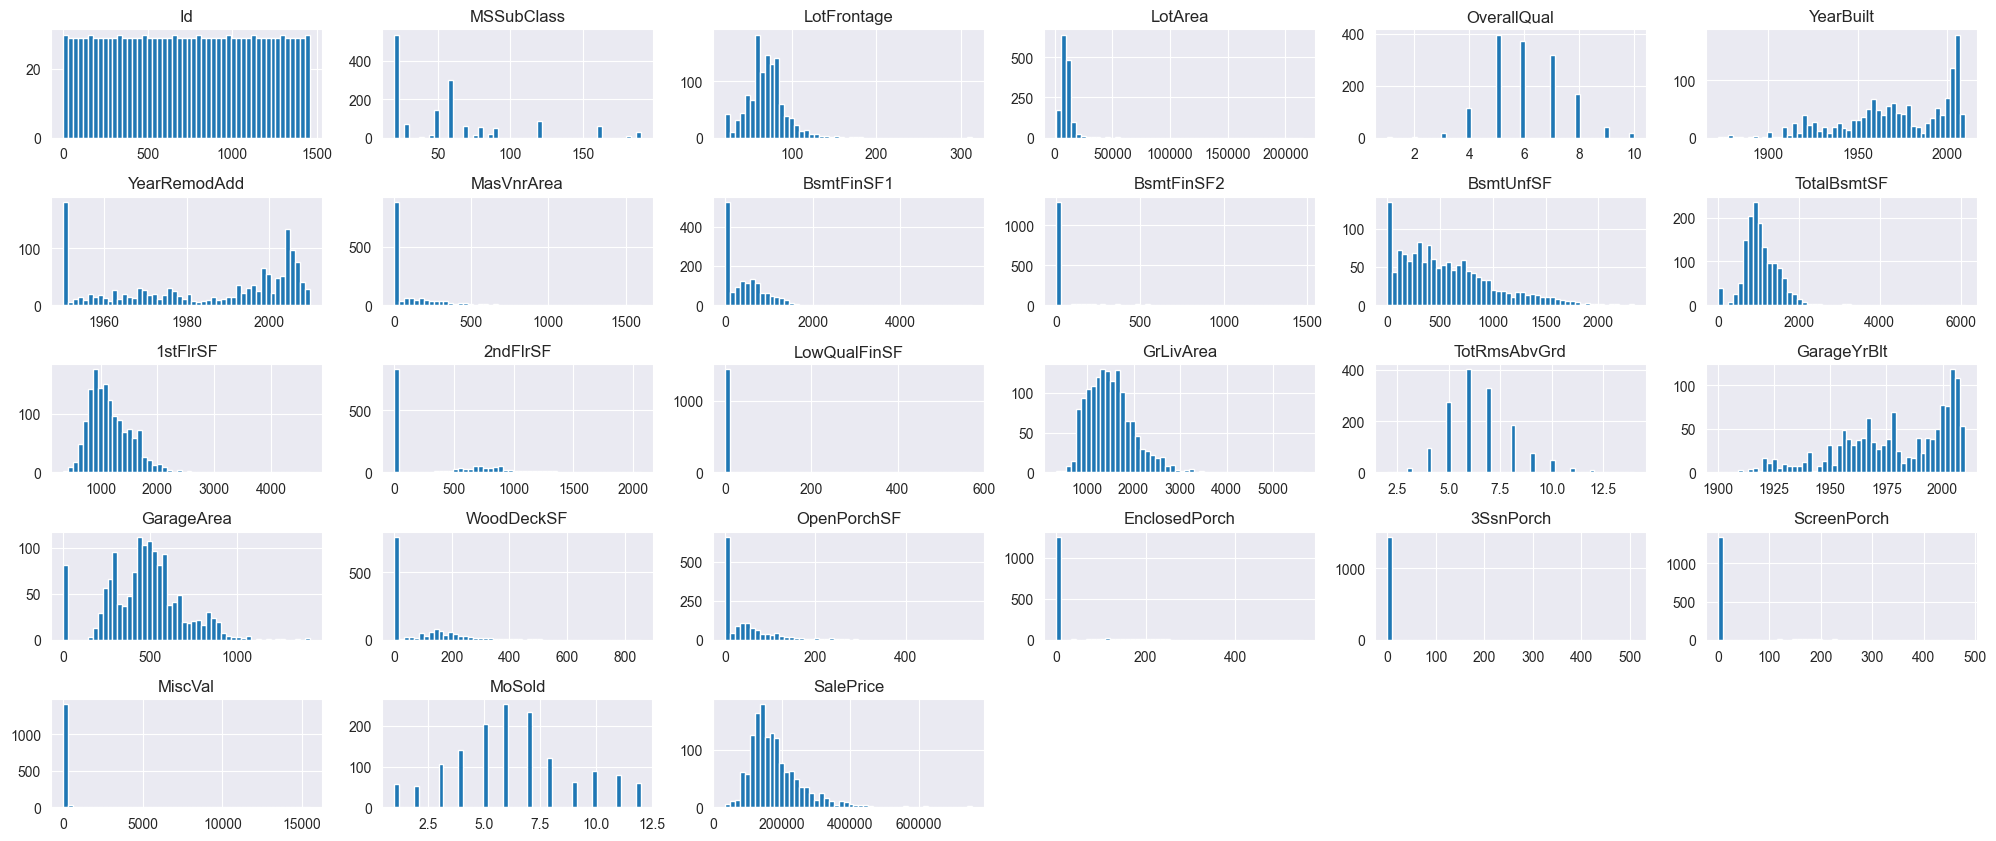

In [478]:
# Tüm Numerik değişkenlerin dağılımı
df[numerical_features].hist(figsize=(20, 20), bins=50, layout=(12, 6))
plt.tight_layout()
plt.show()

In [702]:
missing_values = df.isnull().sum()
missing_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [703]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]

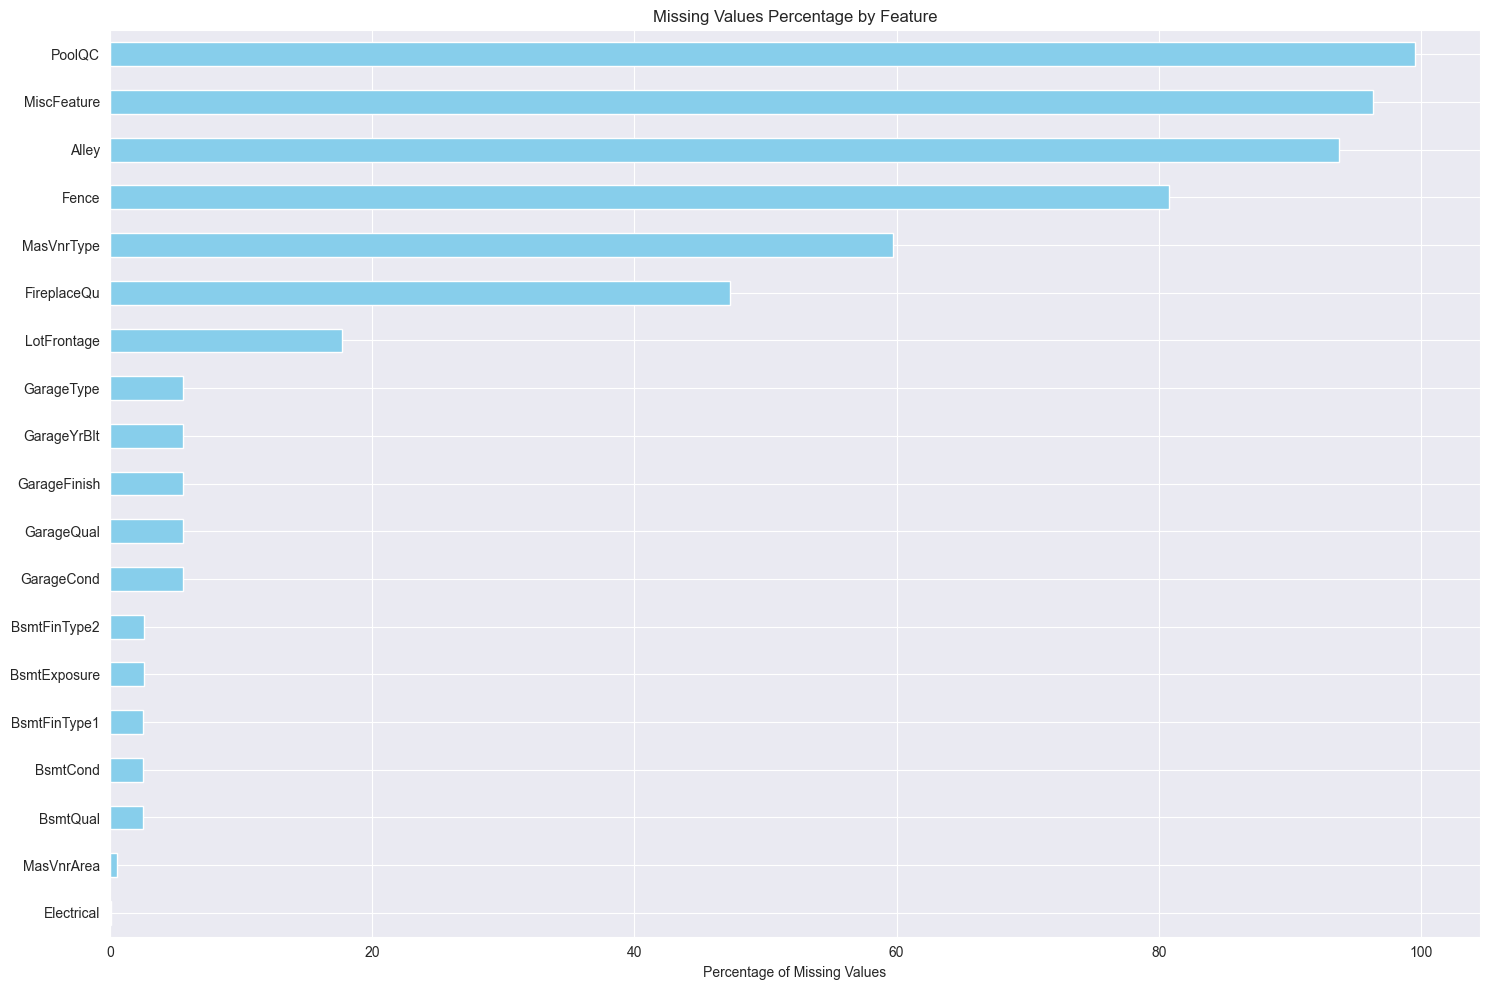

In [481]:
# Plot missing values
plt.figure(figsize=(15, 10))
missing_values.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Values Percentage by Feature')
plt.tight_layout()

/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/3380287088.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)
/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/3380287088.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)
/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/3380287088.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)
/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/3380287088.py:11: UserWarning: set_tic

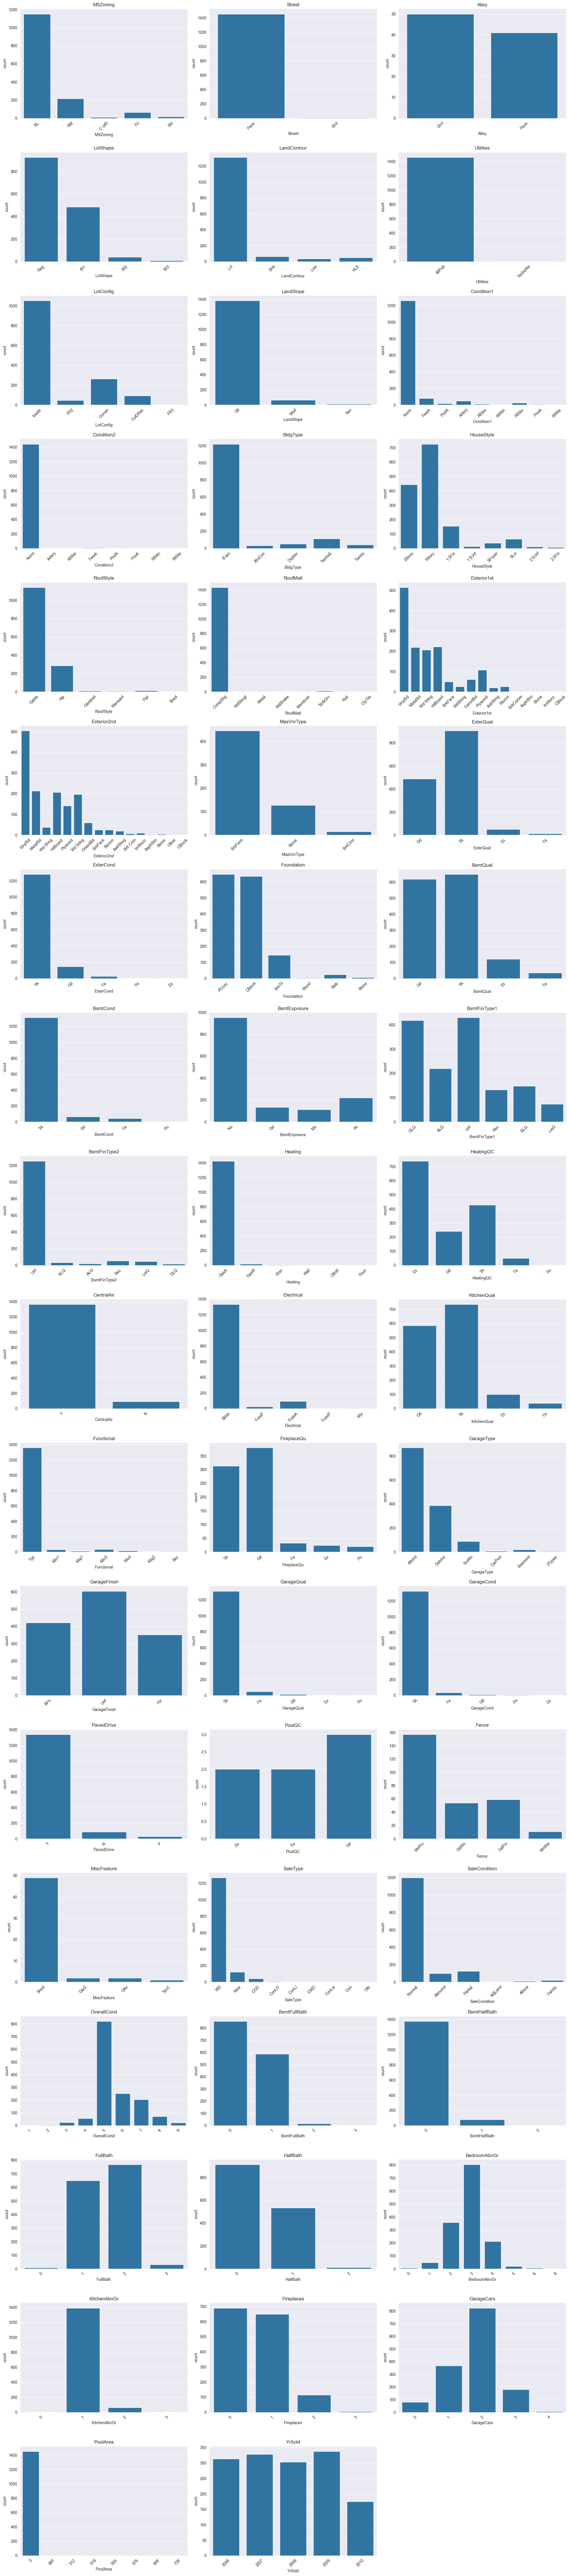

In [482]:
# Subplot ayarları
num_cols = 3  # Bir satırda kaç grafik olacağını belirleyin
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  # Satır sayısını hesaplayın
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
# Plotları doldurma
for i, col in enumerate(categorical_features):
    row = i // num_cols
    col_num = i % num_cols
    sns.countplot(data=df, x=col, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)
    axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)

# Gereksiz boş subplots'ları kapatma
for i in range(len(categorical_features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Layout ayarları
plt.tight_layout()
plt.show()

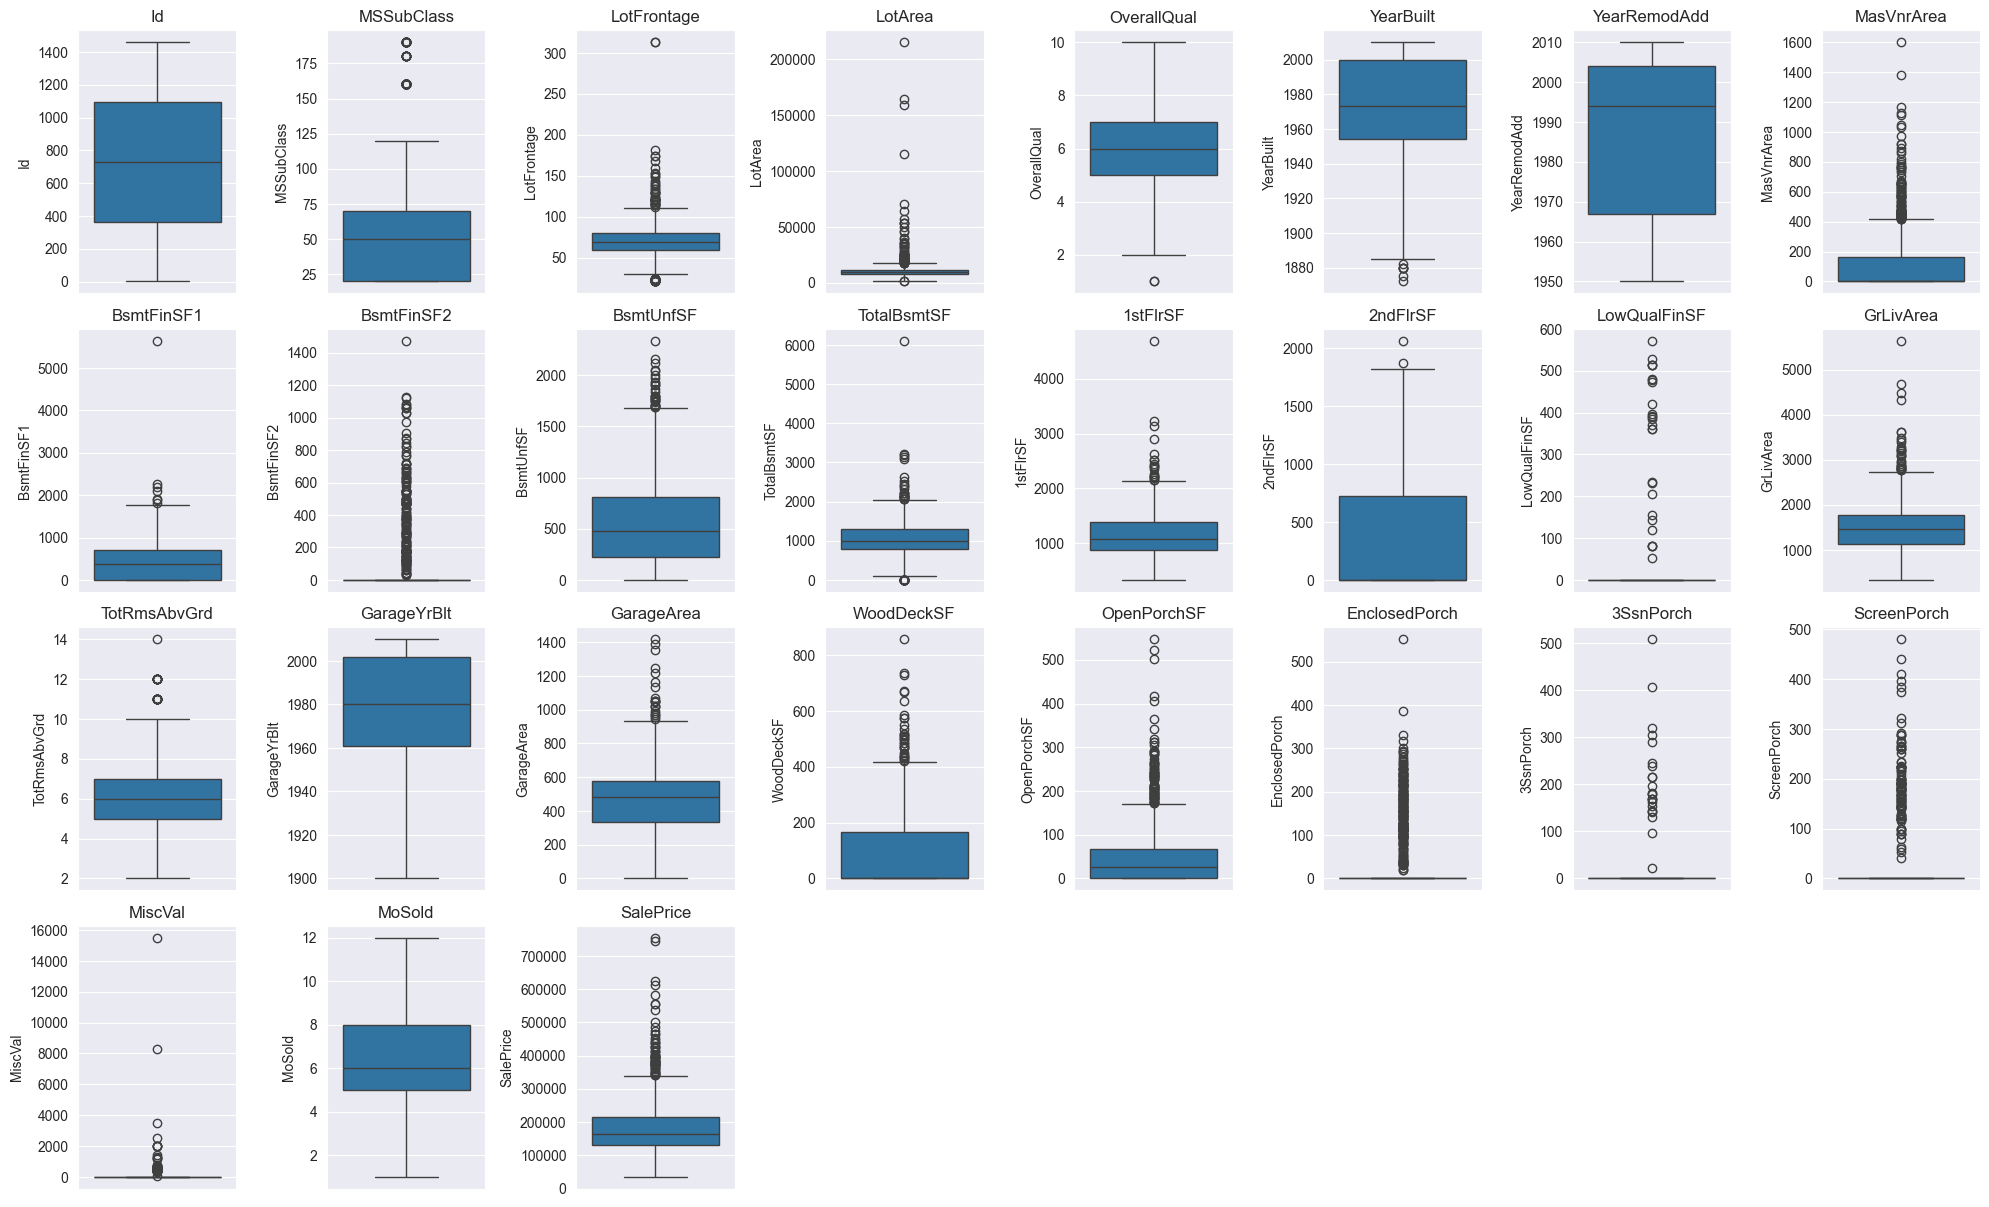

In [483]:
# Create a grid of boxplots
plt.figure(figsize=(20, 30))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(10, 8, i)
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

# Veri Ön İşleme

In [585]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/1991195228.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)
/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/1991195228.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)
/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/1991195228.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)
/var/folders/pk/rtcd8tpj1b3gt_zf5xs9xv340000gp/T/ipykernel_13338/1991195228.py:12: UserWarning: set_tic

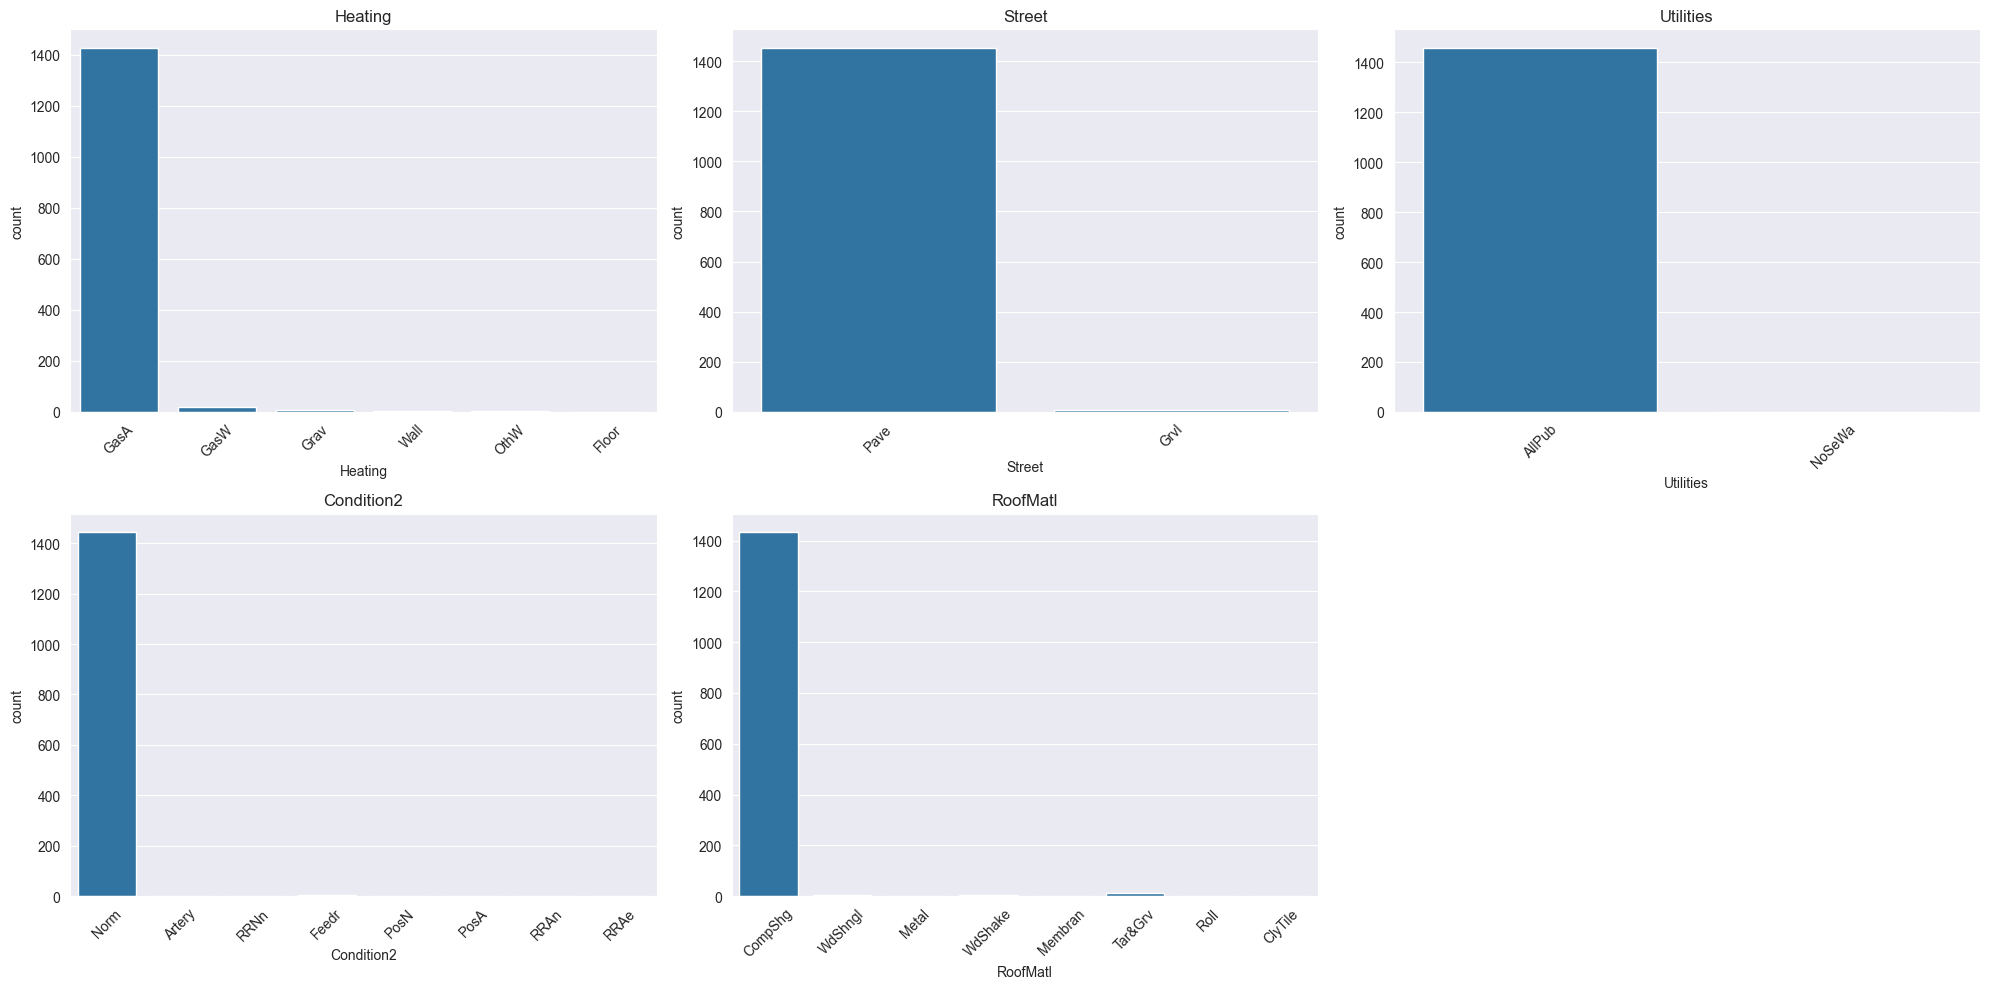

In [485]:
dropColumns=['Heating','Street','Utilities','Condition2', 'RoofMatl']
# Subplot ayarları
num_cols = 3  # Bir satırda kaç grafik olacağını belirleyin
num_rows = (len(dropColumns) + num_cols - 1) // num_cols  # Satır sayısını hesaplayın
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
# Plotları doldurma
for i, col in enumerate(dropColumns):
    row = i // num_cols
    col_num = i % num_cols
    sns.countplot(data=df, x=col, ax=axes[row, col_num])
    axes[row, col_num].set_title(col)
    axes[row, col_num].set_xticklabels(axes[row, col_num].get_xticklabels(), rotation=45)

# Gereksiz boş subplots'ları kapatma
for i in range(len(dropColumns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Layout ayarları
plt.tight_layout()
plt.show()

In [737]:
df.shape

(1460, 81)

In [738]:
data = df.drop(columns=['Heating','Street','Utilities','Condition2', 'RoofMatl', 'Id', 'Neighborhood'])

In [739]:
data.shape

(1460, 74)

In [740]:
numerical_features.remove("Id")
categorical_features.remove("Heating")
categorical_features.remove("Street")
categorical_features.remove("Utilities")
categorical_features.remove("Condition2")
categorical_features.remove("RoofMatl")

In [708]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Outliers

In [741]:
# Define the outlier threshold function
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [742]:
# Define the outlier check function
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [743]:
# Example: Check for outliers in a specific column
outliers_in_saleprice = check_outlier(data, 'SalePrice')
print(f"Outliers in 'SalePrice': {outliers_in_saleprice}")

Outliers in 'SalePrice': True


In [744]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)
    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [745]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [746]:
# Outlier tespiti ve çıkarılması
for col in numerical_features:
    if check_outlier(data, col):
        print(f"{col} sütununda outlier tespit edildi.")
        data = remove_outlier(data, col)

MSSubClass sütununda outlier tespit edildi.
LotFrontage sütununda outlier tespit edildi.
LotArea sütununda outlier tespit edildi.
OverallQual sütununda outlier tespit edildi.
YearBuilt sütununda outlier tespit edildi.
MasVnrArea sütununda outlier tespit edildi.
BsmtFinSF1 sütununda outlier tespit edildi.
BsmtFinSF2 sütununda outlier tespit edildi.
BsmtUnfSF sütununda outlier tespit edildi.
TotalBsmtSF sütununda outlier tespit edildi.
1stFlrSF sütununda outlier tespit edildi.
LowQualFinSF sütununda outlier tespit edildi.
GrLivArea sütununda outlier tespit edildi.
TotRmsAbvGrd sütununda outlier tespit edildi.
GarageArea sütununda outlier tespit edildi.
WoodDeckSF sütununda outlier tespit edildi.
OpenPorchSF sütununda outlier tespit edildi.
EnclosedPorch sütununda outlier tespit edildi.
3SsnPorch sütununda outlier tespit edildi.
ScreenPorch sütununda outlier tespit edildi.
MiscVal sütununda outlier tespit edildi.
SalePrice sütununda outlier tespit edildi.


z-index ile outlier bulma

In [747]:
data.shape

(631, 74)

In [717]:
def get_outlier_counts(df, treshold):
    df = df[numerical_features].copy()
    # Get z-score for specified treshold. shitft and scale, ne kadar mean den uzaklar ı hesaplarız.
    treshold_z_score = stats.norm.ppf(treshold) # norm distribution. ppf: percent point funct. scipy içindfe bir istatik func. cdf nin tersi

    # get the z-scores for each value in track 
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df)), columns=df.columns)
    
    # compare df z-scores to the treshold, Return the count of outliers in each column
    return (z_score_df > treshold_z_score).sum(axis=0)

In [718]:
get_outlier_counts(data , 0.99999)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
TotRmsAbvGrd     0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
MoSold           0
SalePrice        0
dtype: int64

z-index ile outlier kaldırma ( alternatif )

In [663]:
def remove_outliers(df, treshold):

    df1 = df.copy()
	
    #Get z-score for specified treshold
    treshold_z_score = stats.norm.ppf(treshold)

    #get the z-scores for each value in track and compare them to the treshold
    z_score_df = pd.DataFrame(np.abs(stats.zscore(df1[numerical_features])), columns=numerical_features)

    z_score_df = z_score_df > treshold_z_score
    # Get indicies of outliers
    outliers = z_score_df.sum(axis=1) # her rowdaki outliers toplamı
    outliers = outliers > 0

    outliers_indicies = df1.index[outliers]

    #Drop outliers
    df = df.drop(outliers_indicies, axis=0).reset_index(drop=True)

    return df

In [666]:
data = remove_outliers(data, 0.99999)

In [667]:
data.shape

(1340, 74)

In [748]:
# Missing Valueları bulma
missing_values = data.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values

LotFrontage     18.383518
Alley           96.354992
MasVnrType      57.686212
MasVnrArea       0.792393
BsmtExposure     0.158479
Electrical       0.158479
FireplaceQu     52.931854
GarageType       5.388273
GarageYrBlt      5.388273
GarageFinish     5.388273
GarageQual       5.388273
GarageCond       5.388273
PoolQC          99.841521
Fence           81.616482
MiscFeature     99.841521
dtype: float64

In [750]:
threshold = 0.8 * len(data)
columns_to_drop = missing_values[missing_values > 80].index
columns_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [751]:
categorical_features.remove("Alley")
categorical_features.remove("PoolQC")
categorical_features.remove("Fence")
categorical_features.remove("MiscFeature")

In [752]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,NaN,Reg,Lvl,Inside,Gtl,Norm,1Fam,1Story,8,5,2004,2005,Gable,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [753]:
# %80 den fazla missing value olan columnları kaldırma
data.drop(columns=columns_to_drop, inplace=True)

In [754]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Reg,Lvl,Inside,Gtl,Norm,1Fam,1Story,8,5,2004,2005,Gable,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000


In [725]:
data.shape

(631, 70)

Fill missing Values

In [755]:
# Fill missing values for numerical features with the median
data[numerical_features] = data[numerical_features].apply(lambda x: x.fillna(x.median()))

In [756]:
# Fill missing values for categorical features with the mode
data[categorical_features] = data[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))


In [757]:
# Verify that there are no missing values left
missing_values_after_filling = data.isnull().sum().sum()
missing_values_after_filling

np.int64(0)

Yeni özellikler oluşturma

In [758]:
# Yeni özellikler oluşturma
#Yaşam alanı, bir evin toplam yaşam alanını ifade eder ve bodrum katı, zemin katı ve ikinci kat alanlarını içerebilir.
data['TotalLivArea'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] 
#Evin yaşını hesaplamak, evin yeni veya eski olup olmadığını belirlemeye yardımcı olabilir.
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
#Evin en son yenilendiği tarihten itibaren geçen süreyi hesaplamak, yenilemelerin evin değerine etkisini anlamaya yardımcı olabilir.
data['RemodAge'] = data['YrSold'] - data['YearRemodAdd']
#Evin toplam banyo sayısını hesaplamak, evin büyüklüğünü ve rahatlığını ifade edebilir.
data['TotalBath'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])
#Evin toplam oda sayısını hesaplamak, evin büyüklüğünü ifade edebilir.
data['TotalRooms'] = data['TotRmsAbvGrd'] + data['BedroomAbvGr']
#Garajın yaşını hesaplamak, garajın evin yaşına oranla ne kadar yeni veya eski olduğunu belirlemek için kullanılabilir.
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']
#Evin toplam sundurma alanını hesaplamak, evin dış mekan olanaklarını ifade edebilir.
data['TotalPorchSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
#Toplam yaşam alanını toplam oda sayısına bölerek, her oda başına düşen yaşam alanını hesaplayabiliriz. Bu, evin ne kadar ferah olduğunu ifade edebilir.
data['LivAreaPerRoom'] = data['TotalLivArea'] / data['TotalRooms']
#Garaj alanını garajdaki araba sayısına bölerek, garajın ne kadar verimli kullanıldığını gösterebiliriz.
data['GarageCarsPerArea'] = data['GarageArea'] / data['GarageCars']
#Toplam bodrum alanı, birinci kat alanı, ikinci kat alanı ve garaj alanını birleştirerek toplam inşaat alanını hesaplayabiliriz.
data['TotalConstructionArea'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF'] + data['GarageArea']


In [759]:
# Her ayın mevsimsel etkisini göstermek için bir indeks oluşturabiliriz. Bu, satışların yıl içindeki dağılımını ve mevsimsel etkilerini belirlemeye yardımcı olabilir.
def get_season(month):
    if month in [12, 1, 2]:
        return 1  # Winter
    elif month in [3, 4, 5]:
        return 2  # Spring
    elif month in [6, 7, 8]:
        return 3  # Summer
    else:
        return 4  # Fall

data['MonthlySeasonalIndex'] = data['MoSold'].apply(get_season)

In [760]:
#Ev yaşını kategorilere ayırarak (yeni, orta yaşlı, eski gibi), evlerin yaşını daha anlamlı bir şekilde ifade edebiliriz.
def get_age_category(age):
    if age < 10:
        return 'New'
    elif age < 50:
        return 'MidAge'
    else:
        return 'Old'

data['AgeCategory'] = data['HouseAge'].apply(get_age_category)

In [761]:
# Apply the function to get column names
categorical_features, numerical_features, cat_but_car = grab_col_names(data)
# Output the results
print(f"Categorical columns: {categorical_features}")
print(f"Numerical columns: {numerical_features}")
print(f"Cardinal columns: {cat_but_car}")

Categorical columns: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'AgeCategory', 'OverallQual', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'TotalBath', 'MonthlySeasonalIndex']
Numerical columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt',

In [733]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivArea,HouseAge,RemodAge,TotalBath,TotalRooms,GarageAge,TotalPorchSF,LivAreaPerRoom,GarageCarsPerArea,TotalConstructionArea,MonthlySeasonalIndex,AgeCategory
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,2566,5,5,3.5,11,5.0,61,233.272727,274.000000,3114,1,New
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,2524,31,31,2.5,9,31.0,0,280.444444,230.000000,2984,2,MidAge
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,2706,7,6,3.5,9,7.0,42,300.666667,304.000000,3314,4,New
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3343,8,8,3.5,13,8.0,84,257.153846,278.666667,4179,1,New
6,20,RL,75.0,10084,Reg,Lvl,Inside,Gtl,Norm,1Fam,1Story,8,5,2004,2005,Gable,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000,3380,3,2,3.0,10,3.0,57,338.000000,318.000000,4016,3,New


Kategorik değişkenlerin encoding'i

In [766]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'M

In [795]:
# One-Hot Encoding (cat_cols için kullanılabilir, cat_but_car hariç)
encoded_data = pd.get_dummies(data, columns=[col for col in categorical_features if col], drop_first=True)

In [796]:
encoded_data.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,TotalLivArea,HouseAge,RemodAge,TotalRooms,GarageAge,TotalPorchSF,LivAreaPerRoom,GarageCarsPerArea,TotalConstructionArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeCategory_New,AgeCategory_Old,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,Fireplaces_1,Fireplaces_2,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PoolArea_576,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,TotalBath_1.5,TotalBath_2.0,TotalBath_2.5,TotalBath_3.0,TotalBath_3.5,TotalBath_4.0,TotalBath_5.0,TotalBath_6.0,MonthlySeasonalIndex_2,MonthlySeasonalIndex_3,MonthlySeasonalIndex_4
0,60,65.0,8450,2003,2003,196.0,706,150,856,856,854,1710,2003.0,548,0,61,2,208500,2566,5,5,11,5.0,61,233.272727,274.000000,3114,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False

Modelleme

In [799]:
cleanedData = encoded_data.copy()

In [800]:
cleanedData.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,TotalLivArea,HouseAge,RemodAge,TotalRooms,GarageAge,TotalPorchSF,LivAreaPerRoom,GarageCarsPerArea,TotalConstructionArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeCategory_New,AgeCategory_Old,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,Fireplaces_1,Fireplaces_2,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PoolArea_576,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,TotalBath_1.5,TotalBath_2.0,TotalBath_2.5,TotalBath_3.0,TotalBath_3.5,TotalBath_4.0,TotalBath_5.0,TotalBath_6.0,MonthlySeasonalIndex_2,MonthlySeasonalIndex_3,MonthlySeasonalIndex_4
0,60,65.0,8450,2003,2003,196.0,706,150,856,856,854,1710,2003.0,548,0,61,2,208500,2566,5,5,11,5.0,61,233.272727,274.000000,3114,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False

In [801]:
# Apply the function to get column names
categorical_features, numerical_features, cat_but_car = grab_col_names(cleanedData)
# Output the results
print(f"Categorical columns: {categorical_features}")
print(f"Numerical columns: {numerical_features}")
print(f"Cardinal columns: {cat_but_car}")

Categorical columns: ['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd

In [802]:
# Fill missing values for numerical features with the median
cleanedData[numerical_features] = cleanedData[numerical_features].apply(lambda x: x.fillna(x.median()))

In [803]:
# Fill missing values for categorical features with the mode
cleanedData[categorical_features] = cleanedData[categorical_features].apply(lambda x: x.fillna(x.mode()[0]))

In [804]:
# Verify that there are no missing values left
missing_values_after_filling = cleanedData.isnull().sum().sum()
missing_values_after_filling

np.int64(0)

In [812]:
cleanedData.shape

(631, 221)

In [897]:
# Veri ve hedef değişkenlerin ayrılması
X = cleanedData.drop(['SalePrice'], axis=1)
y = cleanedData['SalePrice']


In [898]:
# Eğitim ve test verilerinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [906]:
with open('training_columns.txt', 'w') as file:
    for col in X.columns:
        file.write(f"{col}\n")

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'TotalBath_2.0', 'TotalBath_2.5', 'TotalBath_3.0', 'TotalBath_3.5',
       'TotalBath_4.0', 'TotalBath_5.0', 'TotalBath_6.0',
       'MonthlySeasonalIndex_2', 'MonthlySeasonalIndex_3',
       'MonthlySeasonalIndex_4'],
      dtype='object', length=220)

In [899]:
# Ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [900]:
# Modellerin tanımlanması
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [901]:
# Modellerin eğitilmesi ve değerlendirilmesi
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+10, tolerance: 1.409e+08
  model = cd_fast.enet_coordinate_descent(


In [902]:
# Sonuçların yazdırılması
results_df = pd.DataFrame(results).T
print(results_df)

                            MSE            R²
Linear Regression  2.582092e+31 -9.455040e+21
Ridge Regression   4.219480e+08  8.454921e-01
Lasso Regression   4.600802e+08  8.315289e-01
Decision Tree      8.797045e+08  6.778720e-01
Random Forest      6.172782e+08  7.739666e-01


In [912]:
# Kaydetme
from joblib import dump, load
dump(models['Lasso Regression'], 'LASSO_regression_model.joblib')

['LASSO_regression_model.joblib']

hyperparameter tuning

In [904]:
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [819]:
# Define hyperparameter grids
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}
lasso_params = {'alpha': [0.1, 1, 10, 100, 1000]}
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}


In [820]:
# Perform GridSearchCV for Ridge Regression
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_

# Perform GridSearchCV for Lasso Regression
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_

# Perform GridSearchCV for Random Forest
rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+10, tolerance: 1.135e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+10, tolerance: 1.105e+08
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

In [821]:
# Evaluate models
models = {
    'Ridge Regression': ridge_best,
    'Lasso Regression': lasso_best,
    'Random Forest': rf_best
}

In [822]:
results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}

In [823]:
# results
results_df = pd.DataFrame(results).T
print(results_df)

                           MSE        R²
Ridge Regression  4.061607e+08  0.851273
Lasso Regression  3.834148e+08  0.859602
Random Forest     5.877616e+08  0.784775


PCA

In [876]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [892]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=13) 
X_pca = pca.fit_transform(X_scaled)

In [893]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [894]:
# Modellerin tanımlanması
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [910]:
# Compare predictions with actual values
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.show()

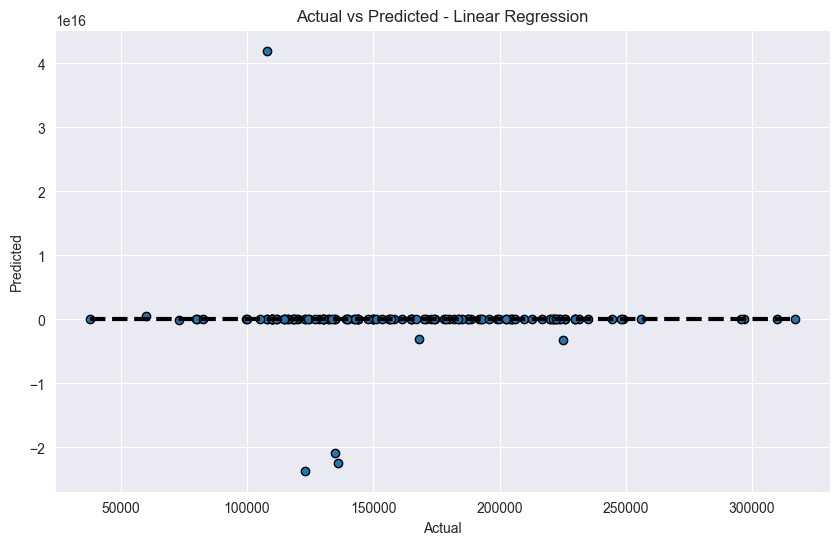

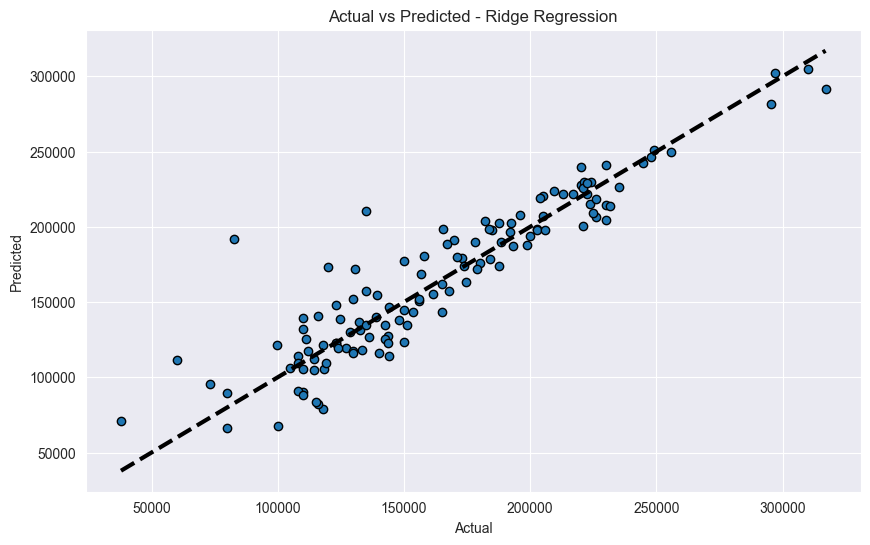

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+10, tolerance: 1.409e+08
  model = cd_fast.enet_coordinate_descent(


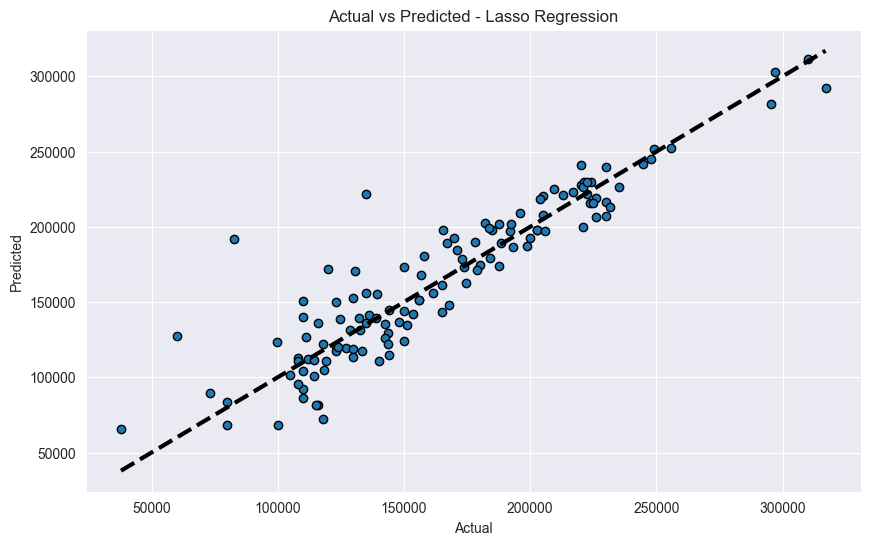

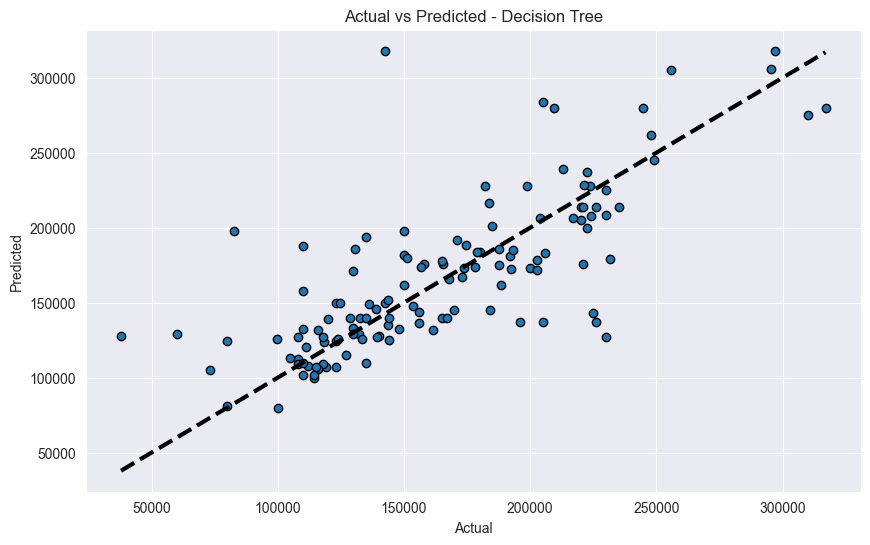

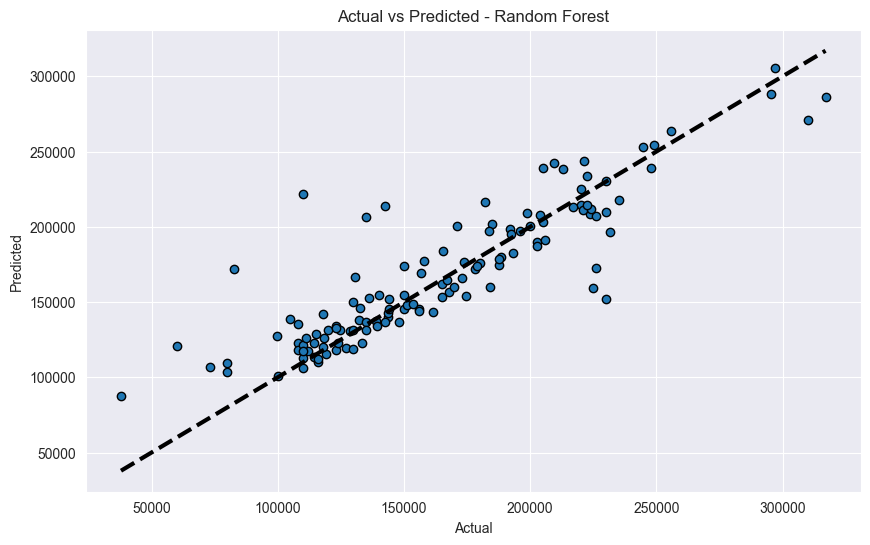

In [911]:
# Modellerin eğitilmesi ve değerlendirilmesi
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R²': r2}
    plot_predictions(y_test, y_pred, model_name)

In [896]:
# Sonuçların yazdırılması
results_df = pd.DataFrame(results).T
print(results_df)

                            MSE        R²
Linear Regression  4.987549e+08  0.817367
Ridge Regression   4.986338e+08  0.817411
Lasso Regression   4.987348e+08  0.817375
Decision Tree      8.434131e+08  0.691161
Random Forest      5.059167e+08  0.814745
